# Intro
<center><h1>Bike Sharing Analysis and Forecast using Facebook Prophet</h1></center>
<center><h2>(Self-Inisiative Project to Explore Time Series using Modern Time Series Alghorithm)</h2></center>

![image.png]()

# About Project
## Business Narrative
Bike-sharing systems offer a convenient solution for urban mobility, allowing users to rent and return bicycles automatically. These systems play a critical role in addressing traffic congestion, environmental concerns, and promoting healthy lifestyles. With over 500 programs globally, the system generates rich data on user behavior and urban mobility patterns, making it a valuable source for research and optimization of bike-sharing services.

## Problem Statement
The challenge is to predict the number of bike rentals based on various factors such as time, weather conditions, and user type (casual or registered). Accurate predictions can help in demand forecasting, optimizing bike availability, and improving user satisfaction.

## Project Goals
* **Predict Demand**: Build a predictive model to forecast the total number of bike rentals for specific time intervals.
* **Understand Trends**: Identify key factors (season, weather, time) that influence bike rental demand.
* **Optimize Resources**: Help bike-sharing companies allocate bikes effectively to different stations based on predicted demand.

## About Dataset

<center><b>Table 1.1</b> Dataset Information Table</p></center>

| Field        | Description                                                                                                                                                    |
|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| instant      | Record index                                                                                                                                                   |
| dteday       | Date                                                                                                                                                           |
| season       | Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)                                                                                                               |
| yr           | Year (0: 2011, 1: 2012)                                                                                                                                        |
| mnth         | Month (1 to 12)                                                                                                                                                |
| hr           | Hour (0 to 23)                                                                                                                                                 |
| holiday      | Whether the day is a holiday or not                                                                                                                            |
| weekday      | Day of the week                                                                                                                                                |
| workingday   | If the day is neither a weekend nor a holiday (1: working day, 0: otherwise)                                                                                    |
| weathersit   | Weather situation (1: Clear, 2: Mist + Cloudy, 3: Light Snow/Rain, 4: Heavy Rain/Snow)                                                                          |
| temp         | Normalized temperature in Celsius (scaled between -8 and +39)                                                                                                   |
| atemp        | Normalized feeling temperature in Celsius (scaled between -16 and +50)                                                                                          |
| hum          | Normalized humidity (values divided by 100)                                                                                                                    |
| windspeed    | Normalized wind speed (values divided by 67)                                                                                                                   |
| casual       | Count of casual users                                                                                                                                          |
| registered   | Count of registered users                                                                                                                                      |
| cnt          | Total number of rentals (casual + registered)                                                                                                                  |


# Load Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import (
    month_plot, quarter_plot,
    plot_acf, plot_pacf
)
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# save path
path_train = "/content/drive/MyDrive/Colab Notebooks/Time-Series/Modern Time Series Forecasting Techniques/Prophet/Daily Bike Sharing training.csv"
path_future = "/content/drive/MyDrive/Colab Notebooks/Time-Series/Modern Time Series Forecasting Techniques/Prophet/Daily Bike Sharing future.csv"

Mounted at /content/drive


In [4]:
# Load the daily bike sharing data

# training data
df = pd.read_csv(path_train)

# future data
future_df = pd.read_csv(path_future)

# see training data
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,697,11/27/2012,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959
697,698,11/28/2012,4,1,11,0,3,1,1,0.296667,0.289762,0.506250,0.210821,198,5062,5260
698,699,11/29/2012,4,1,11,0,4,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
699,700,11/30/2012,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.058471,362,5306,5668


In [5]:
# see future data
future_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,702,12/2/2012,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,NaN,NaN,NaN
1,703,12/3/2012,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,NaN,NaN,NaN
2,704,12/4/2012,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,NaN,NaN,NaN
3,705,12/5/2012,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,NaN,NaN,NaN
4,706,12/6/2012,4,1,12,0,4,1,1,0.255833,0.258204,0.508750,0.174754,NaN,NaN,NaN
5,707,12/7/2012,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.130600,NaN,NaN,NaN
6,708,12/8/2012,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,NaN,NaN,NaN
7,709,12/9/2012,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,NaN,NaN,NaN
8,710,12/10/2012,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308,NaN,NaN,NaN
9,711,12/11/2012,4,1,12,0,2,1,2,0.353333,0.338363,0.596667,0.296037,NaN,NaN,NaN


In [6]:
# see the datatypes and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


# Data Preprocessings

## Delete Irrelevant Columns

In [7]:
# specify deleted columns
drop_cols = [
    'instant', 'yr', 'mnth', 'workingday',
    'atemp', 'casual', 'registered'
]

# drop columns
df.drop(columns=drop_cols, inplace=True)
future_df.drop(columns=drop_cols, inplace=True)

## Renaming Column

In [8]:
# cz we will use fbprophet, it assert the time_series name must be `ds` and the target must be 'y'
# therefore, we will rename the `dteday` as `dt`, and 'cnt' as `y`
# specify the rename convention
rename_dict = {
    'dteday' : 'ds',
    'cnt' : 'y'
}

# rename the column
df.rename(columns = rename_dict, inplace=True)
future_df.rename(columns = rename_dict, inplace=True)

## Fixing Datatypes

In [9]:
# set ds into datetkime object
df['ds'] = pd.to_datetime(df['ds'], format = '%m/%d/%Y')
df.head()

,ds,season,holiday,weekday,weathersit,temp,hum,windspeed,y
0,2011-01-01,1,0,6,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,2,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,3,1,0.226957,0.436957,0.186900,1600


# Exploratory Data Analysis

## Create Temporary Dataframe

In [10]:
# since pandas is better at analyzing time series data when the index is actually within datetime format
# it is a good idea to create temporary dataframe where it uses `ds` column as index

# create temp. dataframe
df_temp = df.copy()

# set freq as daily
df_temp.index.freq = 'D'

# set `ds` column as index
df_temp.set_index('ds', inplace=True)

# set freq
df_temp.index.freq = 'D'

# see the result
df_temp.head(3)

,season,holiday,weekday,weathersit,temp,hum,windspeed,y
ds,,,,,,,,
2011-01-01,1,0,6,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,1,0.196364,0.437273,0.248309,1349


In [11]:
# check the freq index`
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq='D')

In [12]:
# for better exploration expiriences we need to make encodings into category
# import categorical dtypes from pandas api
from pandas.api.types import CategoricalDtype

# create custome categorical dtypes
# holiday dtype
holiday_dtype = CategoricalDtype(categories = ["holiday", "not holiday"], ordered = False)
# weekday dtype
weekday_dtype = CategoricalDtype(categories = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"], ordered = True)
# weathersit dtype
weathersit_dtype = CategoricalDtype(categories = ["clear", "mist", "rain"], ordered = False)
# season dtype
season_dtype = CategoricalDtype(categories = ["springer", "summer", "fall", "winter"], ordered = False)

# change the value
# for holiday
df_temp['holiday'] = df_temp['holiday'].apply(lambda x: "holiday" if x==1 else "not holiday").astype(holiday_dtype)
# for weekday
day_map = {
    0: 'monday',
    1: 'tuesday',
    2: 'wednesday',
    3: 'thursday',
    4: 'friday',
    5: 'saturday',
    6: 'sunday'
}
df_temp['weekday'] = df_temp['weekday'].map(day_map).astype(weekday_dtype)

# for weather situation
weather_map = {
    1: 'clear',
    2: 'mist',
    3: 'rain'
}
df_temp['weathersit'] = df_temp['weathersit'].map(weather_map).astype(weathersit_dtype)

# for weather seasons
season_map = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter',
}
df_temp['season'] = df_temp['season'].map(season_map).astype(season_dtype)

In [13]:
# check the result
df_temp.head(3)

,season,holiday,weekday,weathersit,temp,hum,windspeed,y
ds,,,,,,,,
2011-01-01,springer,not holiday,sunday,mist,0.344167,0.805833,0.160446,985
2011-01-02,springer,not holiday,monday,mist,0.363478,0.696087,0.248539,801
2011-01-03,springer,not holiday,tuesday,clear,0.196364,0.437273,0.248309,1349


## Plot The Data

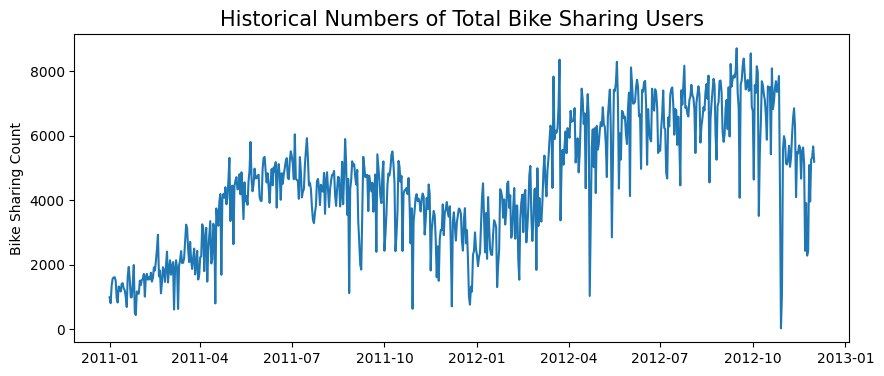

In [14]:
# Plot all data all
fig, ax = plt.subplots(1,1,figsize=(10, 4))

sns.lineplot(df_temp, y='y', x = df_temp.index, ax=ax)
ax.set_ylabel('Bike Sharing Count')
ax.set_xlabel(None)
plt.title("Historical Numbers of Total Bike Sharing Users", size=15)

plt.show();

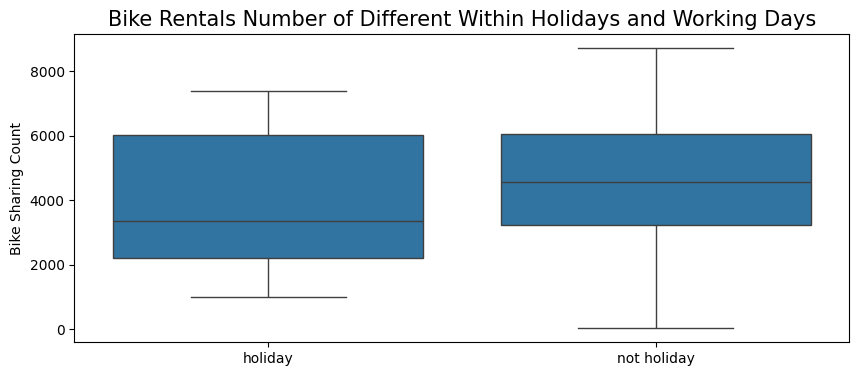

In [15]:
# Plot all data of bike sharing for holidays
fig, ax = plt.subplots(1,1,figsize=(10, 4))

sns.boxplot(df_temp, y='y', x = 'holiday', ax=ax)
ax.set_ylabel('Bike Sharing Count')
ax.set_xlabel(None)
plt.title("Bike Rentals Number of Different Within Holidays and Working Days", size=15)

plt.show();

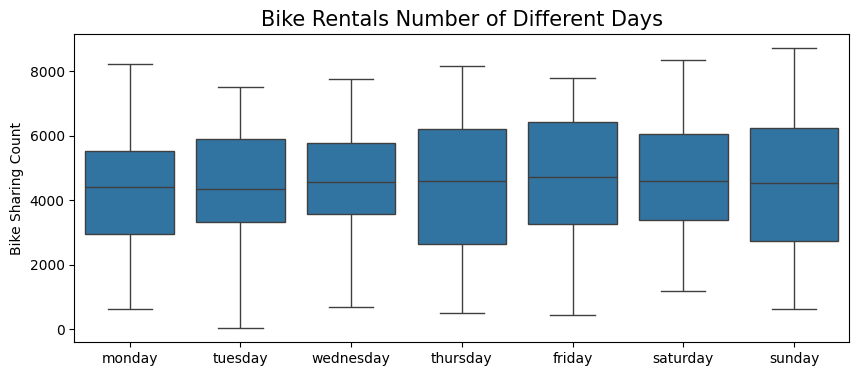

In [16]:
# Plot all data of bike sharing for different days
fig, ax = plt.subplots(1,1,figsize=(10, 4))

sns.boxplot(df_temp, y='y', x = 'weekday', ax=ax)
ax.set_ylabel('Bike Sharing Count')
ax.set_xlabel(None)
plt.title("Bike Rentals Number of Different Days", size=15)

plt.show();

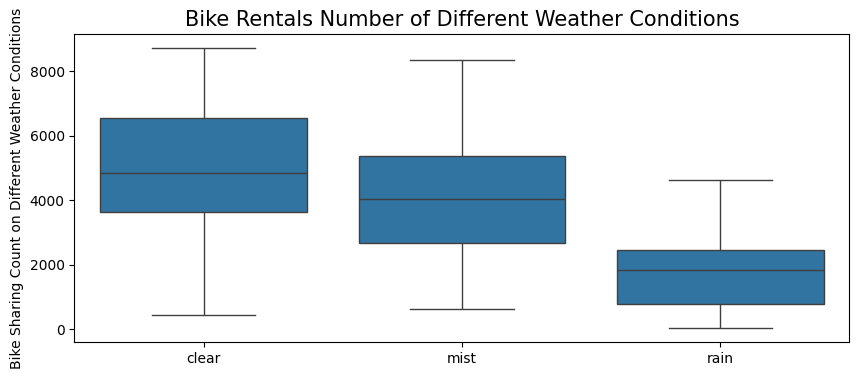

In [17]:
# Plot all data of bike sharing for different weather conditions
fig, ax = plt.subplots(1,1,figsize=(10, 4))

sns.boxplot(df_temp, y='y', x = 'weathersit')
ax.set_ylabel('Bike Sharing Count on Different Weather Conditions')
ax.set_xlabel(None)
plt.title("Bike Rentals Number of Different Weather Conditions", size=15)

plt.show();

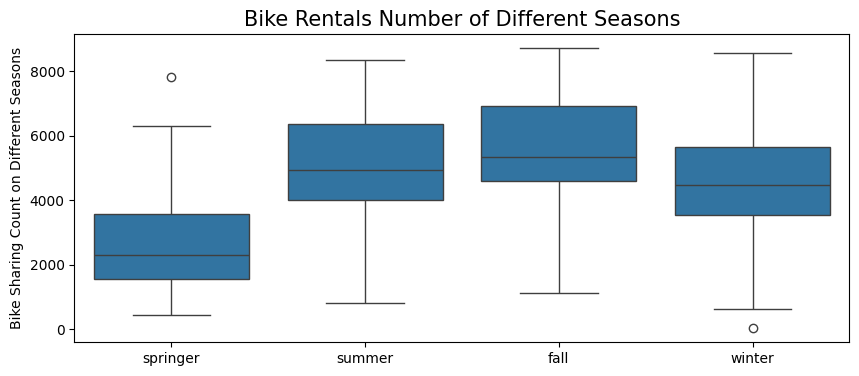

In [18]:
# Plot all data

fig, ax = plt.subplots(1,1,figsize=(10, 4))

sns.boxplot(df_temp, y='y', x = 'season', ax=ax)
ax.set_ylabel('Bike Sharing Count on Different Seasons')
ax.set_xlabel(None)
plt.title("Bike Rentals Number of Different Seasons", size=15)

plt.show();

## See Correlations

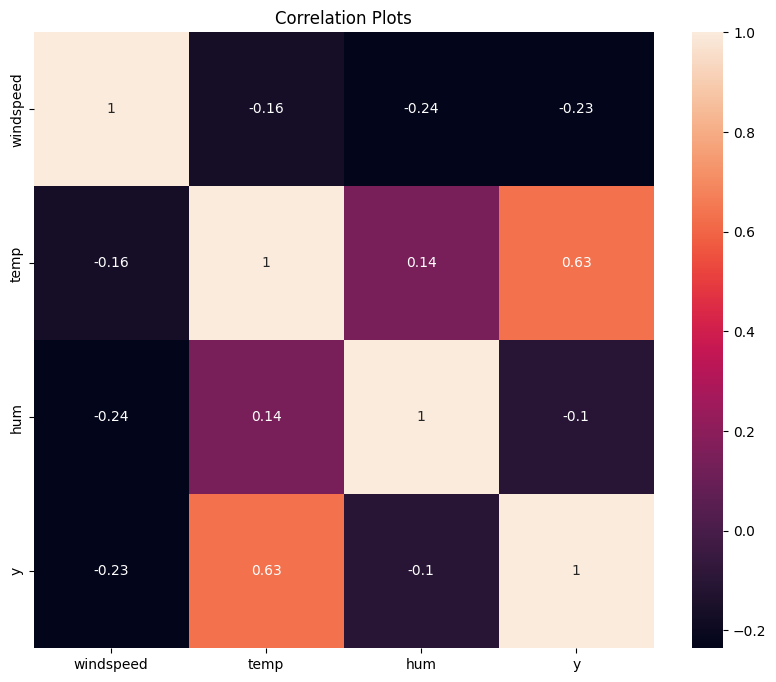

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

sns.heatmap(df_temp[['windspeed', 'temp', 'hum', 'y']].corr(), annot=True, ax=ax)
plt.title("Correlation Plots")
plt.show();

**Insight:**
1. from corr plot, we see that y, which stands for the total number of bike sharing users, has positive corr with increase in temp. it makes sense since west peaple loves to bike during hot weather.
2. there's no multicoliniearity present within dataset

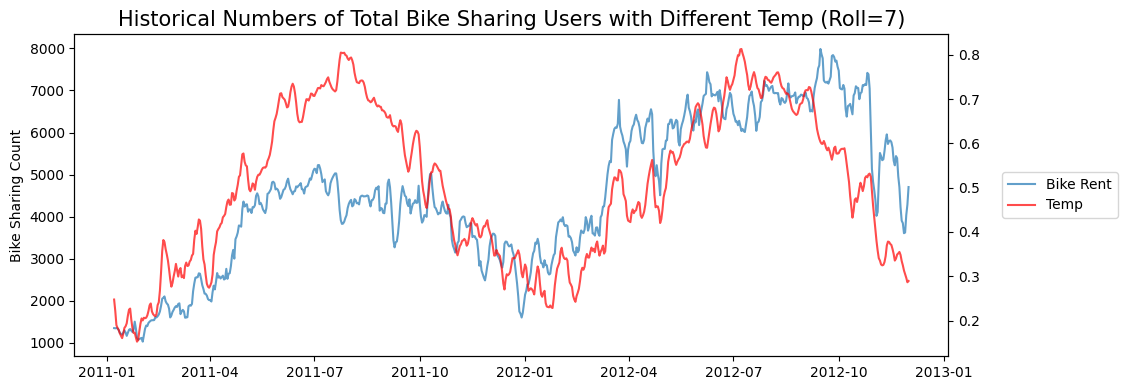

In [20]:
# Plot all data
fig, ax = plt.subplots(1,1,figsize=(10, 4))

ax.plot(df_temp.y.rolling(7).mean(), alpha=.7)

secax = ax.twinx() # instantiate the second axis that share the same X
secax.plot(df_temp.temp.rolling(7).mean(), color='red', alpha=.7)
ax.set_ylabel('Bike Sharing Count')
ax.set_xlabel(None)
plt.title("Historical Numbers of Total Bike Sharing Users with Different Temp (Roll=7)", size=15)
fig.legend(["Bike Rent", "Temp"], loc='center left', bbox_to_anchor=(1, .5))
fig.tight_layout()

plt.show();

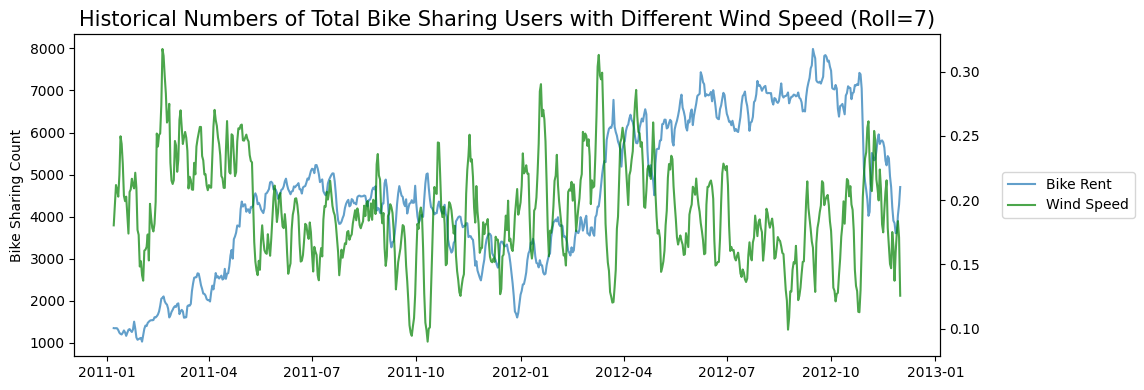

In [21]:
# Plot all data
fig, ax = plt.subplots(1,1,figsize=(10, 4))

ax.plot(df_temp.y.rolling(7).mean(), alpha=.7)

secax = ax.twinx() # instantiate the second axis that share the same X
secax.plot(df_temp.windspeed.rolling(7).mean(), color='green', alpha=.7)
ax.set_ylabel('Bike Sharing Count')
ax.set_xlabel(None)
plt.title("Historical Numbers of Total Bike Sharing Users with Different Wind Speed (Roll=7)", size=15)
fig.legend(["Bike Rent", "Wind Speed"], loc='center left', bbox_to_anchor=(1, .5))
fig.tight_layout()

plt.show();

## Plot Seasonal

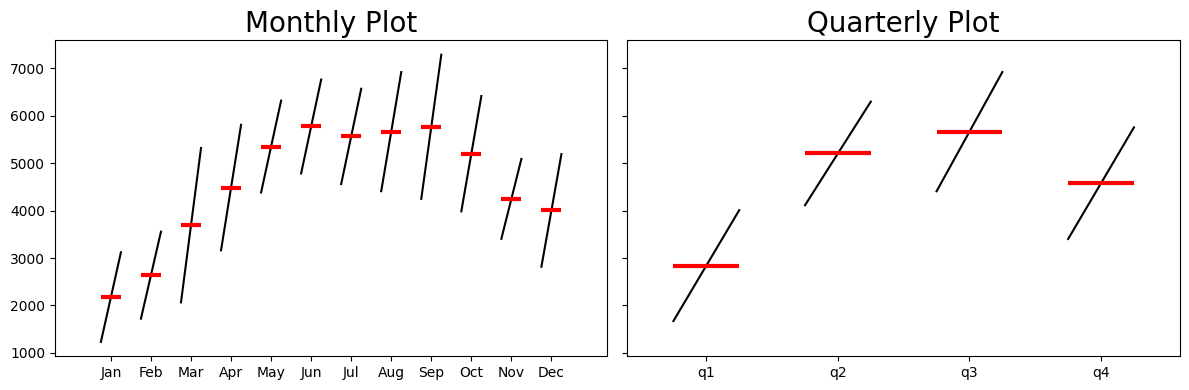

In [22]:
# Plot Monthly and Quarterly Seasonal

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4), sharey=True)

month_plot(df_temp['y'].resample('ME').mean(),
           ax=ax1)
quarter_plot(df_temp['y'].resample('QE').mean(),
             ax=ax2)

ax1.set_title("Monthly Plot", size=20)
ax2.set_title("Quarterly Plot", size=20)
plt.tight_layout()
plt.plot();

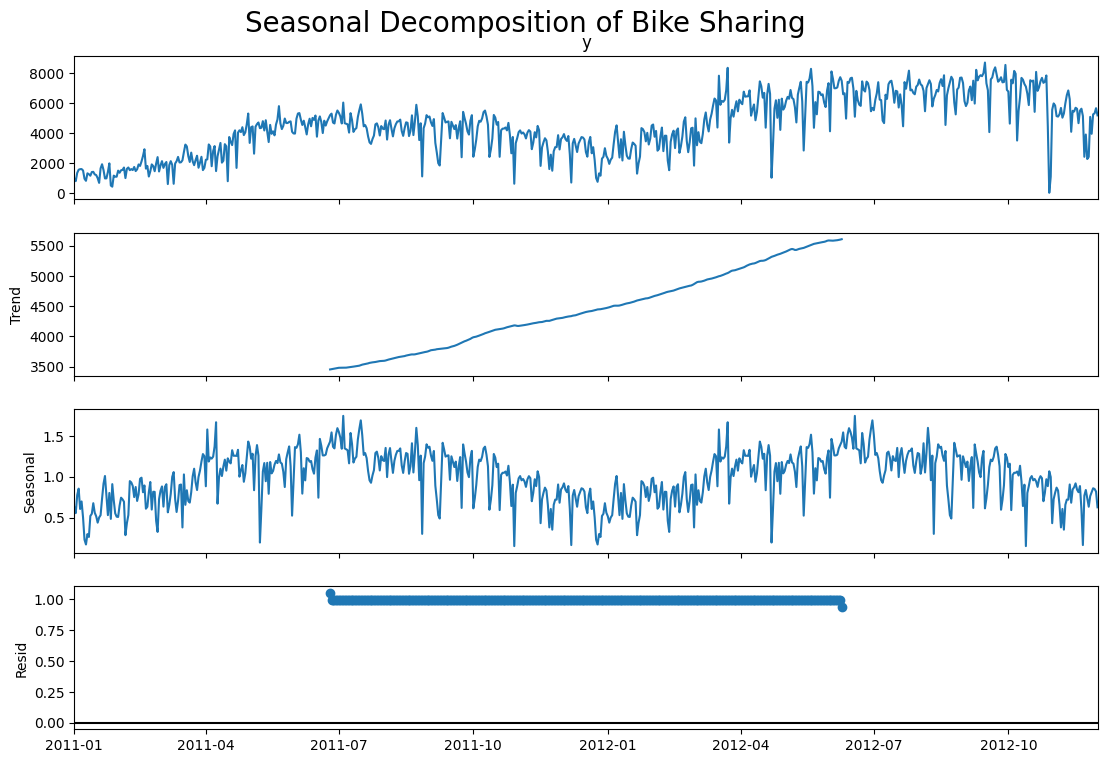

In [23]:
# Seasonal Decomposition Plots for complaint values
# Multiplicative model type, with yearly seasonality (52 weeks)
decomposition = seasonal_decompose(df_temp['y'],
                                   model = 'mul',
                                   period = 350)
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.suptitle("Seasonal Decomposition of Bike Sharing", size=20)
plt.show()

## ACF and PACF Plots

In [24]:
# create function to chech ACF and PACF
def plot_autocorrelations(df, column_name='y', lags=50):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

    plot_acf(df[column_name].dropna(), lags=lags, ax=ax1)
    plot_pacf(df[column_name].dropna(), lags=lags, ax=ax2)

    plt.suptitle(f"ACF dan PACF Plots for Bike Sharing Data, [Lags={lags}]", size=16)
    plt.tight_layout()
    plt.show();

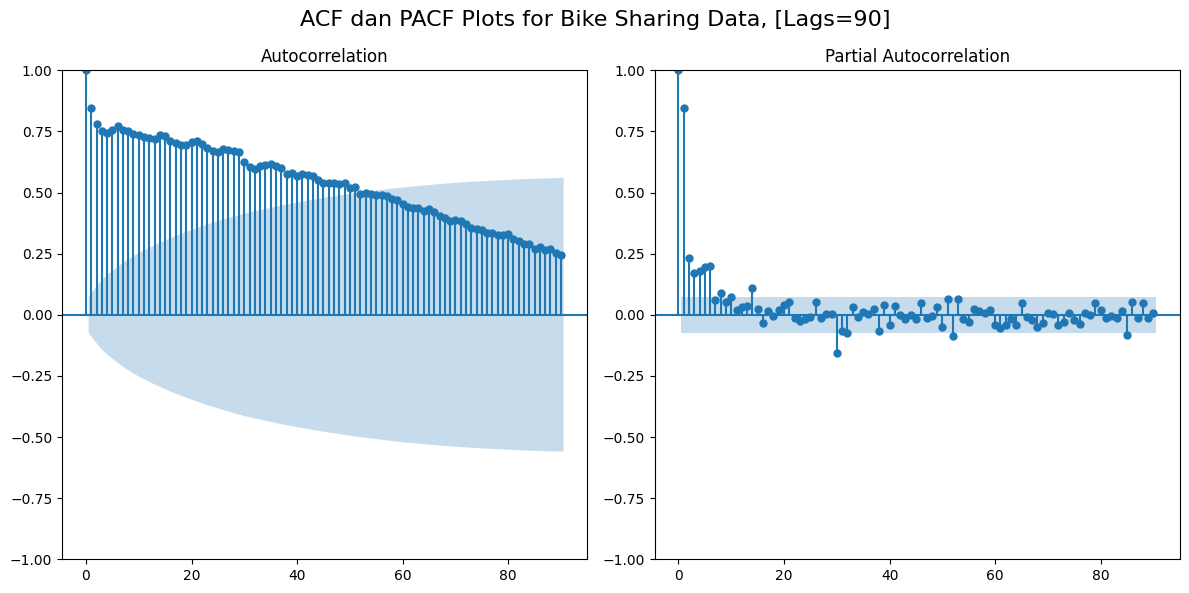

In [25]:
# plot ACF and PACF
plot_autocorrelations(df_temp, column_name='y', lags=90)

**Insight:**
1. From ACF plots, it seems that the indirect effect of previous date is still reserved for around two ago
2. But from PACF plot, the actuall direct effect of date is just from the past 6 days, with the last one is the strongest. and there's no sign of weekly seasonality

## Inspect Holidays

In [26]:
# see all holidays within dataset
df_temp[df_temp.holiday=="holiday"]

,season,holiday,weekday,weathersit,temp,hum,windspeed,y
ds,,,,,,,,
2011-01-17,springer,holiday,tuesday,mist,0.175833,0.537500,0.194017,1000
2011-02-21,springer,holiday,tuesday,mist,0.303333,0.605000,0.307846,1107
2011-04-15,summer,holiday,saturday,clear,0.446667,0.671250,0.226375,3126
2011-05-30,summer,holiday,tuesday,clear,0.733333,0.685000,0.131225,4098
2011-07-04,fall,holiday,tuesday,mist,0.726667,0.637917,0.081479,6043
2011-09-05,fall,holiday,tuesday,mist,0.673333,0.790417,0.212696,3351
2011-10-10,winter,holiday,tuesday,clear,0.570833,0.733750,0.042304,5117
2011-11-11,winter,holiday,saturday,clear,0.324167,0.446250,0.314675,3368
2011-11-24,winter,holiday,friday,clear,0.373333,0.549167,0.167304,1495


Using the data from the internet, we got:

2011 Holidays:
* January 17, 2011 - Martin Luther King Day
* February 21, 2011 - Presidents' Day
* May 30, 2011 - Memorial Day
* July 4, 2011 - Independence Day
* September 5, 2011 - Labor Day
* October 10, 2011 - Columbus Day
* November 11, 2011 - Veterans Day
* November 24, 2011 - Thanksgiving Day
* December 25, 2011 - Christmas Day (observed on December 26)​(Calendarpedia)

2012 Holidays:
* January 2, 2012 - New Year's Day (observed)
* January 16, 2012 - Martin Luther King Day
* February 20, 2012 - Presidents' Day
* May 28, 2012 - Memorial Day
* July 4, 2012 - Independence Day
* September 3, 2012 - Labor Day
* October 8, 2012 - Columbus Day
* November 11, 2012 - Veterans Day (observed on November 12)
* November 22, 2012 - Thanksgiving
* December 25, 2012 - Christmas​(Public Holidays)

FBProphet has advantage to include holidays events within the models, not only just a single point but it can considerate the days effect before and after the actual events, we call this upper and lower window, or in fancy way is Dynamic Events. The reason why FBProphet was build to capture Dynamic Events is becaused the effect of holidays might intervene not only during the event, but also days before or some days after the events. For example, if new year is going happened, maybe some people will not rent a bike before or after the new york since most people will tend to choose to have quality time with family in home rather than biking. Therefore, for better forecasting we can not neglect the effect of dynamic events.

It is a bit tricky to determine the upper and lower window for holidays, since it need a deep understanding on the empirical effect of holidays on the business. But for the sake of simplicity, lets take a general rules that has been generated using chat GPT.
According to ChatGPT, the general rule to set for upper and lower bound of our holidays events are:

* Martin Luther King Day, Presidents' Day, Memorial Day, Labor Day, Columbus Day: These are typically single-day holidays with limited lasting effects beyond the day itself. Suggested lower window: 1 day, upper window: 0 day.

* Independence Day: People often start celebrating a day or two in advance with activities such as fireworks and BBQs. The effect diminishes quickly afterward. Suggested lower window: 1 day, upper window: 1 day.

* Thanksgiving: The shopping frenzy (Black Friday) immediately follows Thanksgiving Day, so the effect extends. Suggested lower window: 1 day, upper window: 1 day.

* Christmas: Leading up to Christmas, there is a lot of consumer and travel activity. The effect may last for a day or two, especially for shopping or post-Christmas sales. Suggested lower window: 2 days, upper window: 1 day.

* New Year's Day: Some celebrations and activities can extend into New Year's Day itself, especially if New Year’s Eve celebrations run late. Suggested lower window: 1 day, upper window: 1 day.

In [27]:
# create holiday dataframe
holidays = pd.DataFrame({
    'holiday': ['Martin Luther King Day', 'Presidents Day', 'Tax Day','Memorial Day', 'Independence Day',
                'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving', 'Christmas Day',
                'New Year\'s Day', 'Martin Luther King Day', 'Presidents Day', 'Tax Day','Memorial Day',
                'Independence Day', 'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving',
                'Christmas Day'],
    'ds': ['2011-01-17', '2011-02-21', '2011-04-15','2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10',
           '2011-11-11', '2011-11-24', '2011-12-25', '2012-01-01', '2012-01-16', '2012-02-20', '2012-04-16',
           '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-22',
           '2012-12-25'],
    'lower_window': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -1, -1,-1,  -1, -1, -1, -1, -1, -2],
    'upper_window': [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
})

In [28]:
# see all result
holidays

,holiday,ds,lower_window,upper_window
0,Martin Luther King Day,2011-01-17,-1,0
1,Presidents Day,2011-02-21,-1,0
2,Tax Day,2011-04-15,-1,0
3,Memorial Day,2011-05-30,-1,0
4,Independence Day,2011-07-04,-1,1
5,Labor Day,2011-09-05,-1,0
6,Columbus Day,2011-10-10,-1,0
7,Veterans Day,2011-11-11,-1,0
8,Thanksgiving,2011-11-24,-1,1
9,Christmas Day,2011-12-25,-2,1


# Feature Engineering

Purpose of lagged values:
- Time series often have autocorrelation, where past values influence future values. Lagged features allow the model to learn from these historical patterns.
- Lagged values give the model information about recent trends and behaviors.
- Lags at specific intervals (e.g., 7 days, 12 months) can help capture seasonal patterns.
- Many time series are autoregressive, where future values depend on past values. Lagged features directly model this dependency.

## Explore Feature Engineering
for this project, since we have only 2 years period, it is not possible to create lagged values of its the number of sharing from the previous year. but we can still work with rolling or lagging the temp. since temp has a moderete impact on the number of bike sharing. and it is also can be considered where people tend to rent the bike a day, or few days before. and sometimes, their relatives invited them to do it when the condition is good. Therefor we will do a quick analysis and comparation of rolling and lagging temp and also include different window to capture this pattern. after that, we will choose the best option for our case

In [29]:
# create lags
windows = [1,2,3,4,5,6,7]

# create for temp in the past
for window in windows:
    df_temp[f'temp_lag_{window}'] = df_temp['temp'].shift(window) # create lagged value for y
    df_temp[f'temp_roll_{window}'] = df_temp['temp'].rolling(window).mean() # create rolling value for y

df_temp.head(3)

,season,holiday,weekday,weathersit,temp,hum,windspeed,y,temp_lag_1,temp_roll_1,...,temp_lag_3,temp_roll_3,temp_lag_4,temp_roll_4,temp_lag_5,temp_roll_5,temp_lag_6,temp_roll_6,temp_lag_7,temp_roll_7
ds,,,,,,,,,,,,,,,,,,,,,
2011-01-01,springer,not holiday,sunday,mist,0.344167,0.805833,0.160446,985,NaN,0.344167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,springer,not holiday,monday,mist,0.363478,0.696087,0.248539,801,0.344167,0.363478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,springer,not holiday,tuesday,clear,0.196364,0.437273,0.248309,1349,0.363478,0.196364,...,NaN,0.301336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# create a list for creating a slice of dataframe to be plotted using Heatmap
actual_cols = ['y', 'temp']
lagged_cols = [f'temp_lag_{window}' for window in windows] + [f'temp_roll_{window}' for window in windows]

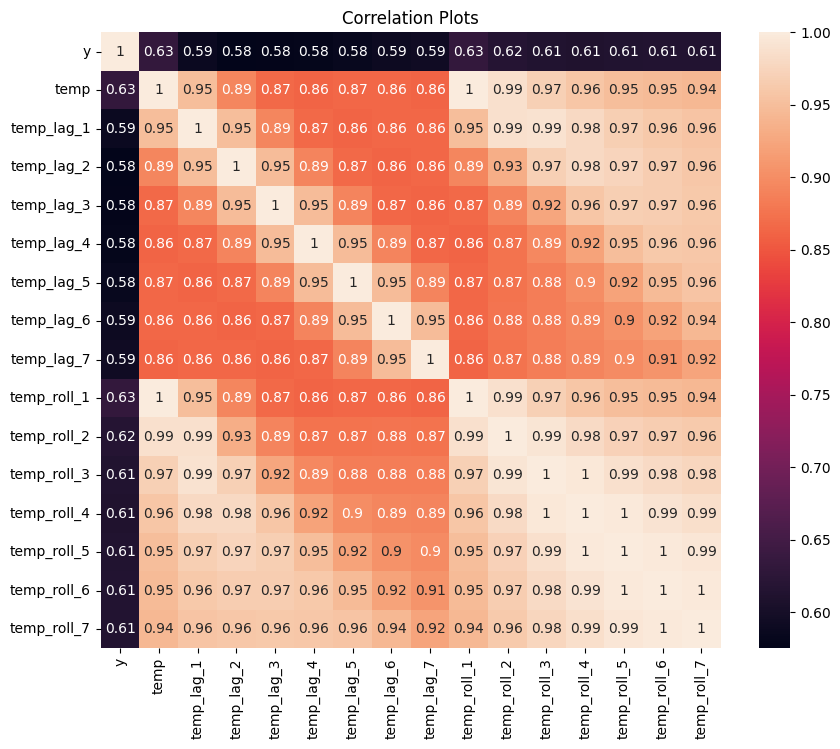

In [31]:
# visualize heatmap
fig, ax = plt.subplots(1,1, figsize=(10,8))

# setting heatmep on predefined columns
sns.heatmap(df_temp[actual_cols + lagged_cols].corr(), annot=True, ax=ax)
plt.title("Correlation Plots")
plt.show();

It seems that rolling technique is better that lagging. so we will use rolling with window = 3 for higher projectory.

# Prepare Dataset

## Create Training Dataset

In [32]:
# create a copy of traing dataframe and save it as train_df
train_df = df.copy()

In [33]:
# see train_df
train_df.head()

,ds,season,holiday,weekday,weathersit,temp,hum,windspeed,y
0,2011-01-01,1,0,6,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,2,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,3,1,0.226957,0.436957,0.186900,1600


## Remove Irrelevant Columns

In [34]:
# set dropped columns
dropped_cols = ["holiday", "hum"]

# drop columns
train_df.drop(columns = dropped_cols, inplace=True)
future_df.drop(columns = dropped_cols, inplace=True)

## Create Rolling Temp

In [35]:
# temp rolling for training dataframe
train_df['temp_roll_3'] = train_df['temp'].rolling(3).mean()

# temp rolling for future dataframe
future_df['temp_roll_3'] = future_df['temp'].rolling(3).mean()

In [36]:
# see the result
train_df.tail()

,ds,season,weekday,weathersit,temp,windspeed,y,temp_roll_3
696,2012-11-27,4,2,2,0.291667,0.237562,3959,0.283611
697,2012-11-28,4,3,1,0.296667,0.210821,5260,0.300556
698,2012-11-29,4,4,1,0.280870,0.115522,5323,0.289735
699,2012-11-30,4,5,1,0.298333,0.058471,5668,0.291957
700,2012-12-01,4,6,2,0.298333,0.059704,5191,0.292512


In [37]:
# see the result
future_df.head()

,ds,season,weekday,weathersit,temp,windspeed,y,temp_roll_3
0,12/2/2012,4,0,2,0.347500,0.124379,NaN,NaN
1,12/3/2012,4,1,1,0.452500,0.082721,NaN,NaN
2,12/4/2012,4,2,1,0.475833,0.174129,NaN,0.425278
3,12/5/2012,4,3,1,0.438333,0.324021,NaN,0.455555
4,12/6/2012,4,4,1,0.255833,0.174754,NaN,0.390000


## Weather Situation and Season Encodings

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
# create encodings

# encoding for weather situation
weathersit_en = OneHotEncoder(sparse_output = False,
                              drop=None)
# fit weathersit data
weathersit_en.fit(train_df[['weathersit']])

# encoding for season
season_en = OneHotEncoder(sparse_output = False,
                          drop=None)
# fit season data
season_en.fit(train_df[['season']])

OneHotEncoder(sparse_output=False)

In [40]:
# create resulted One Hot Encoding

# for weathersit column
weathersit_df = pd.DataFrame(weathersit_en.transform(train_df[['weathersit']]),
                             columns=weathersit_en.get_feature_names_out())

# for season column
season_df = pd.DataFrame(season_en.transform(train_df[['season']]),
                         columns=season_en.get_feature_names_out())

# combine the One Hot Encoding column to original data
train_df = pd.concat([train_df, weathersit_df, season_df], axis=1)

# see the result
train_df.head()

,ds,season,weekday,weathersit,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,2011-01-01,1,6,2,0.344167,0.160446,985,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-02,1,0,2,0.363478,0.248539,801,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-03,1,1,1,0.196364,0.248309,1349,0.301336,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-04,1,2,1,0.200000,0.160296,1562,0.253281,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-05,1,3,1,0.226957,0.186900,1600,0.207774,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
# do it the same way for future dataset

# for weathersit column
weathersit_df = pd.DataFrame(weathersit_en.transform(future_df[['weathersit']]), columns=weathersit_en.get_feature_names_out())
season_df = pd.DataFrame(season_en.transform(future_df[['season']]), columns=season_en.get_feature_names_out())

# for season column
future_df = pd.concat([future_df, weathersit_df, season_df], axis=1)
future_df.head()

,ds,season,weekday,weathersit,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,12/2/2012,4,0,2,0.347500,0.124379,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12/3/2012,4,1,1,0.452500,0.082721,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12/4/2012,4,2,1,0.475833,0.174129,NaN,0.425278,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12/5/2012,4,3,1,0.438333,0.324021,NaN,0.455555,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12/6/2012,4,4,1,0.255833,0.174754,NaN,0.390000,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
# drop the original column

# drop for train_df
train_df.drop(columns=['weathersit', 'season'], inplace=True)
# drop for future_df
future_df.drop(columns=['weathersit', 'season'], inplace=True)

## Filling NaN Values

In [43]:
# feel the NaN with the latest value
train_df.bfill(inplace=True)
future_df.bfill(inplace=True)

In [44]:
# check the final train_df result
train_df.head()

,ds,weekday,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,2011-01-01,6,0.344167,0.160446,985,0.301336,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-02,0,0.363478,0.248539,801,0.301336,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-03,1,0.196364,0.248309,1349,0.301336,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-04,2,0.200000,0.160296,1562,0.253281,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-05,3,0.226957,0.186900,1600,0.207774,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
# check the final future_df result
future_df

,ds,weekday,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,12/2/2012,0,0.347500,0.124379,NaN,0.425278,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12/3/2012,1,0.452500,0.082721,NaN,0.425278,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12/4/2012,2,0.475833,0.174129,NaN,0.425278,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12/5/2012,3,0.438333,0.324021,NaN,0.455555,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12/6/2012,4,0.255833,0.174754,NaN,0.390000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,12/7/2012,5,0.320833,0.130600,NaN,0.338333,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,12/8/2012,6,0.381667,0.101379,NaN,0.319444,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,12/9/2012,0,0.384167,0.157975,NaN,0.362222,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,12/10/2012,1,0.435833,0.190308,NaN,0.400556,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,12/11/2012,2,0.353333,0.296037,NaN,0.391111,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Modelling

In [46]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import ParameterGrid
from prophet.plot import plot_cross_validation_metric

## Plain Fitting

In [ ]:
# Re-fit Model
m = Prophet(
    yearly_seasonality=True,
    holidays = holidays,
    growth = 'linear')
m.add_regressor("temp")
m.add_regressor("temp_roll_3")
m.add_regressor("weathersit_1")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("season_1")
m.add_regressor("season_2")
m.add_regressor("season_3")
m.add_regressor("season_4")
m.fit(train_df)

# Cross-Validation
df_cv = cross_validation(model = m,
                        period = '15 days',
                        initial = '521 days',
                        horizon = '30 days',
                        parallel ='processes')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8og3p6cw/pkli7t8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8og3p6cw/6rf0nwxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5067', 'data', 'file=/tmp/tmp8og3p6cw/pkli7t8o.json', 'init=/tmp/tmp8og3p6cw/6rf0nwxw.json', 'output', 'file=/tmp/tmp8og3p6cw/prophet_modelabpac7gj/prophet_model-20241013132530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concu

## Evaluate Results

In [ ]:
# Performance Metrics
# horizon - the number of time steps (periods) into the future for which predictions are made
# mse - mean squared error
# rmse - root mean squared error
# mae - mean absolute error
# mape - mean absolute percentage error
# mdape - median absolute percentage error
# smape - symmetric mean absolute percentage error
# coverage - the proportion of observed values (y) that fall within the forecast uncertainty intervals ('yhat_lower' to 'yhat_upper').
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.351832e+06,1162.683280,919.185063,0.160525,0.117991,0.146369,0.600000
1,4 days,1.135133e+06,1065.426044,851.221488,0.140699,0.095904,0.132640,0.666667
2,5 days,1.334208e+06,1155.079049,887.737824,0.151498,0.089429,0.138776,0.633333
3,6 days,1.022380e+06,1011.128124,781.498987,0.130065,0.080668,0.121623,0.666667
4,7 days,9.803170e+05,990.109606,749.878216,0.121561,0.079078,0.115315,0.633333
5,8 days,5.583622e+05,747.236347,600.304514,0.086605,0.066593,0.088971,0.666667
6,9 days,4.910483e+05,700.748404,547.472749,0.077882,0.058383,0.080255,0.666667
7,10 days,7.435811e+05,862.311461,650.067824,0.094588,0.073896,0.095322,0.600000
8,11 days,8.950821e+05,946.087775,719.686811,0.109021,0.087031,0.107071,0.600000
9,12 days,1.580491e+06,1257.175847,938.538909,6.318752,0.098297,0.187138,0.566667


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be remov

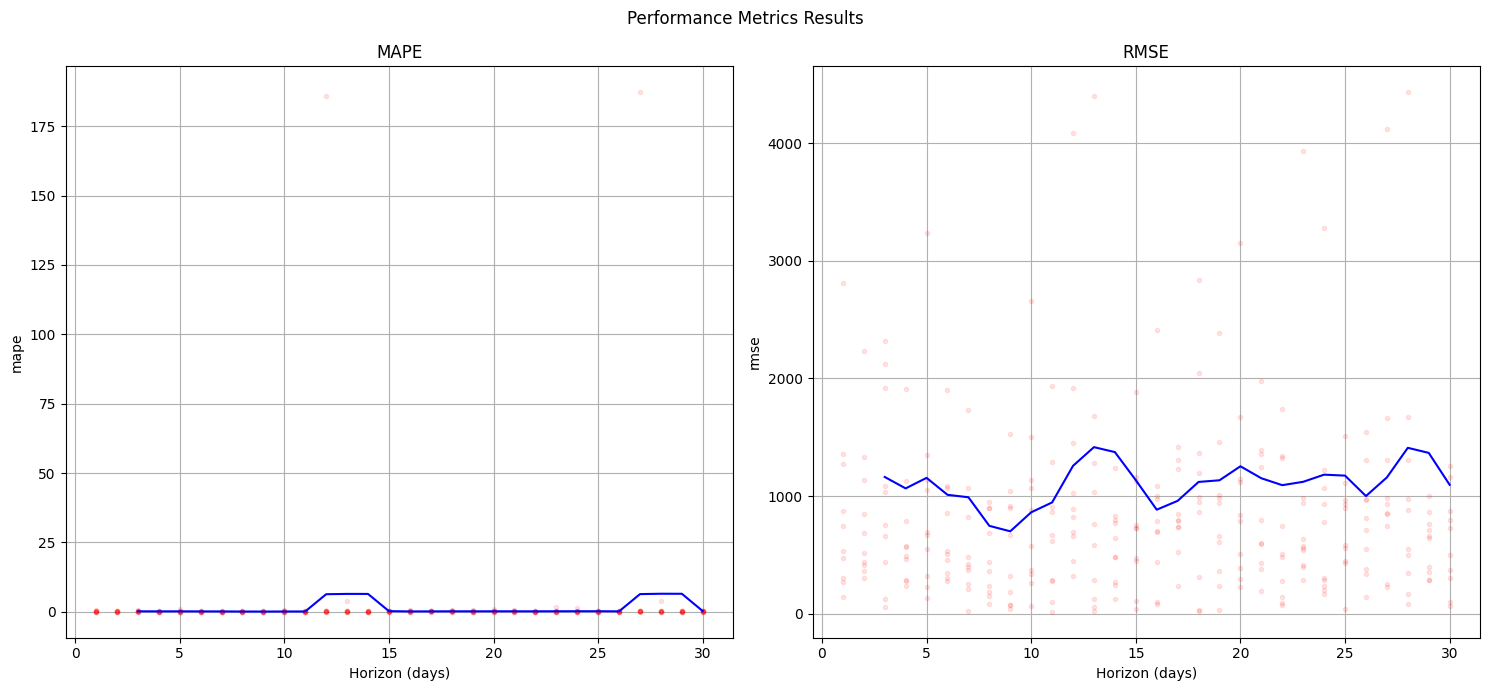

In [ ]:
# Plotting the metrics over time
# Plot Results
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 7))

plot_cross_validation_metric(df_cv, metric = 'mape', point_color='r', ax=ax1)
plot_cross_validation_metric(df_cv, metric = 'rmse', point_color='r', ax=ax2)

ax1.set_title("MAPE")
ax2.set_title("RMSE")
fig.suptitle("Performance Metrics Results")
fig.tight_layout()
plt.show();

In [ ]:
# RMSE and MAPE summary
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1105.0
The MAPE is 149.29 %


## Fixing Training Data

In [ ]:
# Explore the error
df_cv['abs_deviation'] = np.abs(df_cv['y'] - df_cv['yhat'])
df_cv['%_deviation'] = 100 * np.abs(df_cv['yhat']/df_cv['y'] - 1)

In [ ]:
# sort values based on $_deviation, and than print the result
df_cv.sort_values(by='%_deviation', ascending = False, inplace=True)
df_cv.head(50)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,abs_deviation,%_deviation
236,2012-10-29,4140.414733,3296.786562,4912.152282,22,2012-10-02,4118.414733,18720.066969
251,2012-10-29,4109.378949,3277.226605,4988.537329,22,2012-10-17,4087.378949,18578.995222
237,2012-10-30,5527.126774,4735.746447,6340.315626,1096,2012-10-02,4431.126774,404.299888
252,2012-10-30,5498.716278,4602.066478,6330.897121,1096,2012-10-17,4402.716278,401.707690
292,2012-11-24,6206.230836,5279.690769,7125.516043,2277,2012-11-01,3929.230836,172.561741
293,2012-11-25,5698.791127,4847.184022,6574.005329,2424,2012-11-01,3274.791127,135.098644
214,2012-10-07,6745.790603,5879.978731,7627.152362,3510,2012-10-02,3235.790603,92.187766
199,2012-10-07,6657.682440,5842.196304,7448.347580,3510,2012-09-17,3147.682440,89.677562
180,2012-09-18,6886.219751,6151.414843,7751.414600,4073,2012-09-17,2813.219751,69.069967
165,2012-09-18,6482.167553,5639.283620,7306.101470,4073,2012-09-02,2409.167553,59.149707


It is interesting that our model perform badly on data by looking in MAPE metrics. Some values are predicted to be high but actually very low.

Special Case: in Oct 29, 30th 2012 there was a hurricane in Washington. It is expected from the previos data (before hurricane( the forecast must be high. But at that moment was a hurricane that attack the City. Thus reducing the number of peaple for using bike.

In [ ]:
# see the huricane effect on date and y
train_df[(train_df['ds'] >= '2012-10-28') & (train_df['ds'] <= '2012-10-30')]

,ds,weekday,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
666,2012-10-28,0,0.477500,0.398008,4459,0.517778,0.0,1.0,0.0,0.0,0.0,0.0,1.0
667,2012-10-29,1,0.440000,0.358200,22,0.482500,0.0,0.0,1.0,0.0,0.0,0.0,1.0
668,2012-10-30,2,0.318182,0.213009,1096,0.411894,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# replace y in Oct 29th, 2011 with the last data, data in Oct 28th, 2011
train_df.loc[667, 'y'] = train_df[train_df['ds'] == '2012-10-28']['y'].item()
train_df[train_df['ds'] == '2012-10-29']

,ds,weekday,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
667,2012-10-29,1,0.44,0.3582,4459,0.4825,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# replace y in Oct 30th, 2011 with the last data, data in Oct 28th, 2011
train_df.loc[668, 'y'] = train_df[train_df['ds'] == '2012-10-28']['y'].item()
train_df[train_df['ds'] == '2012-10-30']

,ds,weekday,temp,windspeed,y,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
668,2012-10-30,2,0.318182,0.213009,4459,0.411894,0.0,1.0,0.0,0.0,0.0,0.0,1.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8og3p6cw/sgua127r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8og3p6cw/kkcqi1jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44234', 'data', 'file=/tmp/tmp8og3p6cw/sgua127r.json', 'init=/tmp/tmp8og3p6cw/kkcqi1jq.json', 'output', 'file=/tmp/tmp8og3p6cw/prophet_modelwobobsb3/prophet_model-20241013132539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <conc

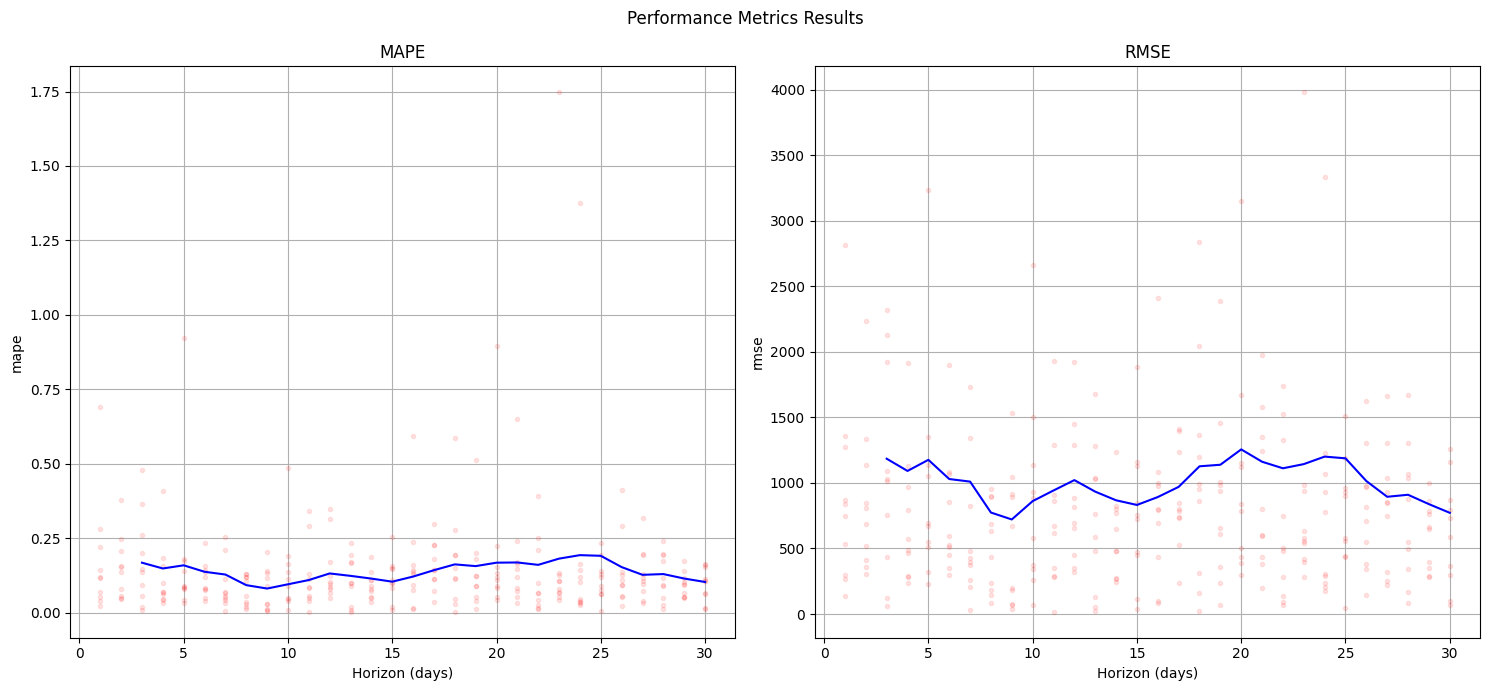

The RMSE is 1002.0
The MAPE is 13.76 %


In [ ]:
## ReRun an See The Different
# Re-fit Model
m = Prophet(
    yearly_seasonality=True,
    holidays = holidays,
    growth = 'linear')
m.add_regressor("temp")
m.add_regressor("temp_roll_3")
m.add_regressor("weathersit_1")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("season_1")
m.add_regressor("season_2")
m.add_regressor("season_3")
m.add_regressor("season_4")
m.fit(train_df)

# Cross-Validation
df_cv = cross_validation(model = m,
                        period = '15 days',
                        initial = '521 days',
                        horizon = '30 days',
                        parallel ='processes')

# calc performance Metrix
performance_metrics(df_cv)

# plot the result and summary

# Plotting the metrics over time
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 7))

plot_cross_validation_metric(df_cv, metric = 'mape', point_color='r', ax=ax1)
plot_cross_validation_metric(df_cv, metric = 'rmse', point_color='r', ax=ax2)

ax1.set_title("MAPE")
ax2.set_title("RMSE")
fig.suptitle("Performance Metrics Results")
fig.tight_layout()
plt.show();

# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

### Tuning Hyper Parameter

1.   List item
2.   List item



In [ ]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['multiplicative', 'additive']
}

In [ ]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_

### Parameter Tuning Loops

In [ ]:
# Placeholder for storing the results
rmse_results = []
mape_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:
  # build the model
  m = Prophet(
      yearly_seasonality=True,
      holidays = holidays,
      growth = 'linear',
      **params)
  m.add_regressor("temp")
  m.add_regressor("temp_roll_3")
  m.add_regressor("weathersit_1")
  m.add_regressor("weathersit_2")
  m.add_regressor("weathersit_3")
  m.add_regressor("season_1")
  m.add_regressor("season_2")
  m.add_regressor("season_3")
  m.add_regressor("season_4")
  m.fit(train_df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                          period = '15 days',
                          initial = '521 days',
                          horizon = '30 days',
                          parallel ='processes')

  # Compute and Store the Error
  # Root Mean Squarred Error
  rmse = performance_metrics(df_cv)['rmse'].mean()
  rmse_results.append(rmse)

  # Mean Absolute Percentage Error
  mape = performance_metrics(df_cv)['mape'].mean()
  mape_results.append(mape)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8og3p6cw/qysb5og_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8og3p6cw/_fj1ubll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11815', 'data', 'file=/tmp/tmp8og3p6cw/qysb5og_.json', 'init=/tmp/tmp8og3p6cw/_fj1ubll.json', 'output', 'file=/tmp/tmp8og3p6cw/prophet_modelq_32k_bo/prophet_model-20241013132846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
13:28:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

In [ ]:
# Parameter Tuning outcome
outcome = pd.DataFrame(all_params)
outcome['rmse_results'] = rmse_results
outcome['mape_results'] = mape_results
outcome.sort_values(by='rmse_results', inplace=True)
outcome

,changepoint_prior_scale,seasonality_mode,seasonality_prior_scale,rmse_results,mape_results
13,0.010,additive,0.10,967.086470,0.130721
14,0.010,additive,1.00,970.148226,0.130932
15,0.010,additive,10.00,974.155987,0.131817
12,0.010,additive,0.01,986.628554,0.134186
8,0.010,multiplicative,0.01,1023.390933,0.133023
20,0.100,additive,0.01,1043.102160,0.144040
4,0.001,additive,0.01,1044.055856,0.141189
9,0.010,multiplicative,0.10,1064.085141,0.134287
11,0.010,multiplicative,10.00,1066.338759,0.134786
21,0.100,additive,0.10,1068.961270,0.147500


In [ ]:
# Fetch the best params
best_params = all_params[rmse_results.index(min(rmse_results))]
best_params

{'changepoint_prior_scale': 0.01,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 0.1}

In [48]:
# Re-fit Model
m = Prophet(
    yearly_seasonality=True,
    holidays = holidays,
    growth = 'linear',
    **best_params)
m.add_regressor("temp")
m.add_regressor("temp_roll_3")
m.add_regressor("weathersit_1")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("season_1")
m.add_regressor("season_2")
m.add_regressor("season_3")
m.add_regressor("season_4")
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprcqv9me2/974dn91g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprcqv9me2/2g2_ku0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79739', 'data', 'file=/tmp/tmprcqv9me2/974dn91g.json', 'init=/tmp/tmprcqv9me2/2g2_ku0l.json', 'output', 'file=/tmp/tmprcqv9me2/prophet_model0w7q316o/prophet_model-20241013153703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:37:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:37:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

## Create Forecasting Data


In FBProphet, we can use 2 methods for creating forecast, they are:
1. Using data with regressor
2. Using data without regressor (Utilizes `m.make_future_dataframe()` function)

In this case, since we have data and it's regressor, we can use the first option

In [49]:
# create pred Data for forecasting

# concatenate on rows for train_df, and future_df
pred_data = pd.concat([train_df, future_df])
# drop y column (cz it is actually a prediction)
pred_data.drop(columns='y', inplace=True)
# see the result
pred_data

,ds,weekday,temp,windspeed,temp_roll_3,weathersit_1,weathersit_2,weathersit_3,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,6,0.344167,0.160446,0.301336,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-02 00:00:00,0,0.363478,0.248539,0.301336,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-03 00:00:00,1,0.196364,0.248309,0.301336,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-04 00:00:00,2,0.200000,0.160296,0.253281,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-05 00:00:00,3,0.226957,0.186900,0.207774,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25,12/27/2012,4,0.254167,0.350133,0.262935,0.0,1.0,0.0,1.0,0.0,0.0,0.0
26,12/28/2012,5,0.253333,0.155471,0.250278,0.0,1.0,0.0,1.0,0.0,0.0,0.0
27,12/29/2012,6,0.253333,0.124383,0.253611,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28,12/30/2012,0,0.255833,0.350754,0.254166,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Do Forecasting

In [50]:
# create forecast using pred_data
forecast = m.predict(pred_data)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,1430.220106,-244.187432,1687.694673,1430.220106,1430.220106,0.0,0.0,0.0,0.0,...,160.742384,160.742384,160.742384,-808.586665,-808.586665,-808.586665,0.0,0.0,0.0,715.425091
1,2011-01-02,1436.216595,-485.749677,1373.247400,1436.216595,1436.216595,0.0,0.0,0.0,0.0,...,-283.100249,-283.100249,-283.100249,-747.013347,-747.013347,-747.013347,0.0,0.0,0.0,447.151118
2,2011-01-03,1442.213085,-623.870541,1373.884125,1442.213085,1442.213085,0.0,0.0,0.0,0.0,...,-178.325179,-178.325179,-178.325179,-687.827594,-687.827594,-687.827594,0.0,0.0,0.0,355.652248
3,2011-01-04,1448.209574,-256.262054,1693.031723,1448.209574,1448.209574,0.0,0.0,0.0,0.0,...,-41.226211,-41.226211,-41.226211,-631.514389,-631.514389,-631.514389,0.0,0.0,0.0,738.952631
4,2011-01-05,1454.206063,218.054510,2221.159334,1454.206063,1454.206063,0.0,0.0,0.0,0.0,...,47.622349,47.622349,47.622349,-578.493902,-578.493902,-578.493902,0.0,0.0,0.0,1192.460736


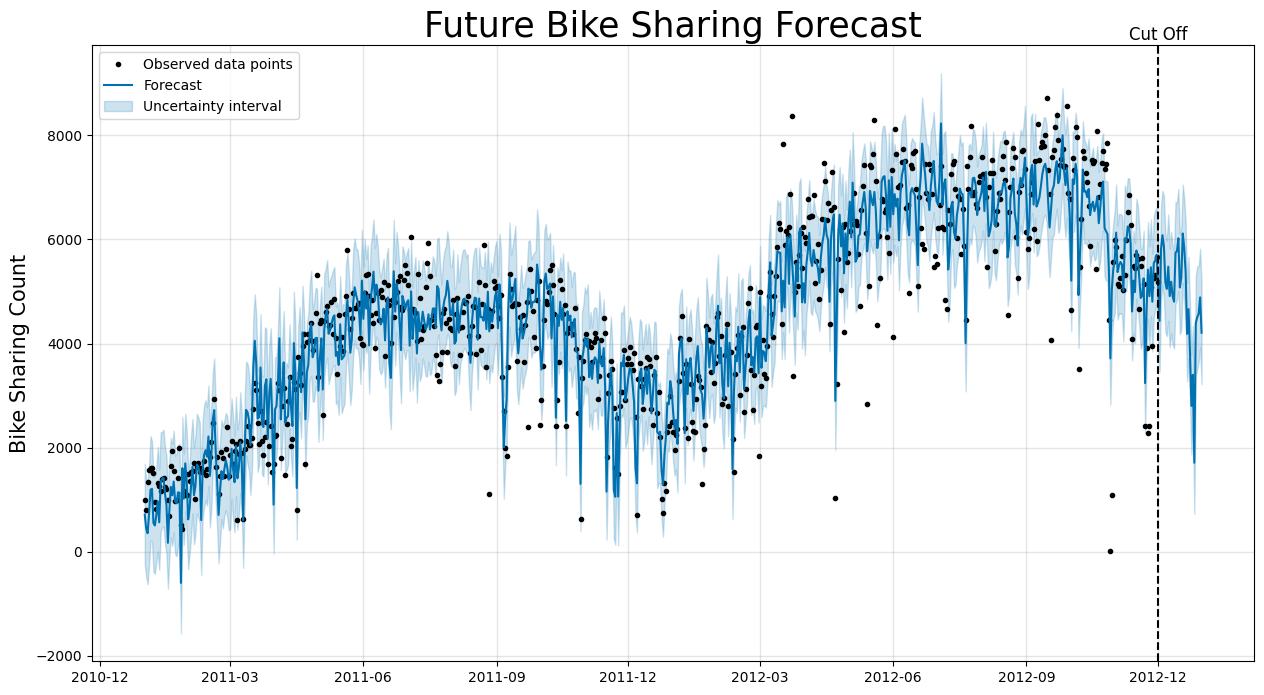

In [51]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# main plot of forecast, built-in func from FBProphet
m.plot(forecast, ax=ax, include_legend=True)

# create a cuttof line (seperate predition on training and future data)
cutoff = train_df['ds'].max()
ax.axvline(cutoff, color='black', linestyle='--')

# Add label "Cut Off" at the vertical line
ax.text(cutoff, ax.get_ylim()[1] * 1.01, "Cut Off", color='black', size=12,
        horizontalalignment='center')

# add plot accesories
plt.title("Future Bike Sharing Forecast", size=25)
plt.xlabel(None)
plt.ylabel("Bike Sharing Count", size=15)
plt.show();

## Plot Components

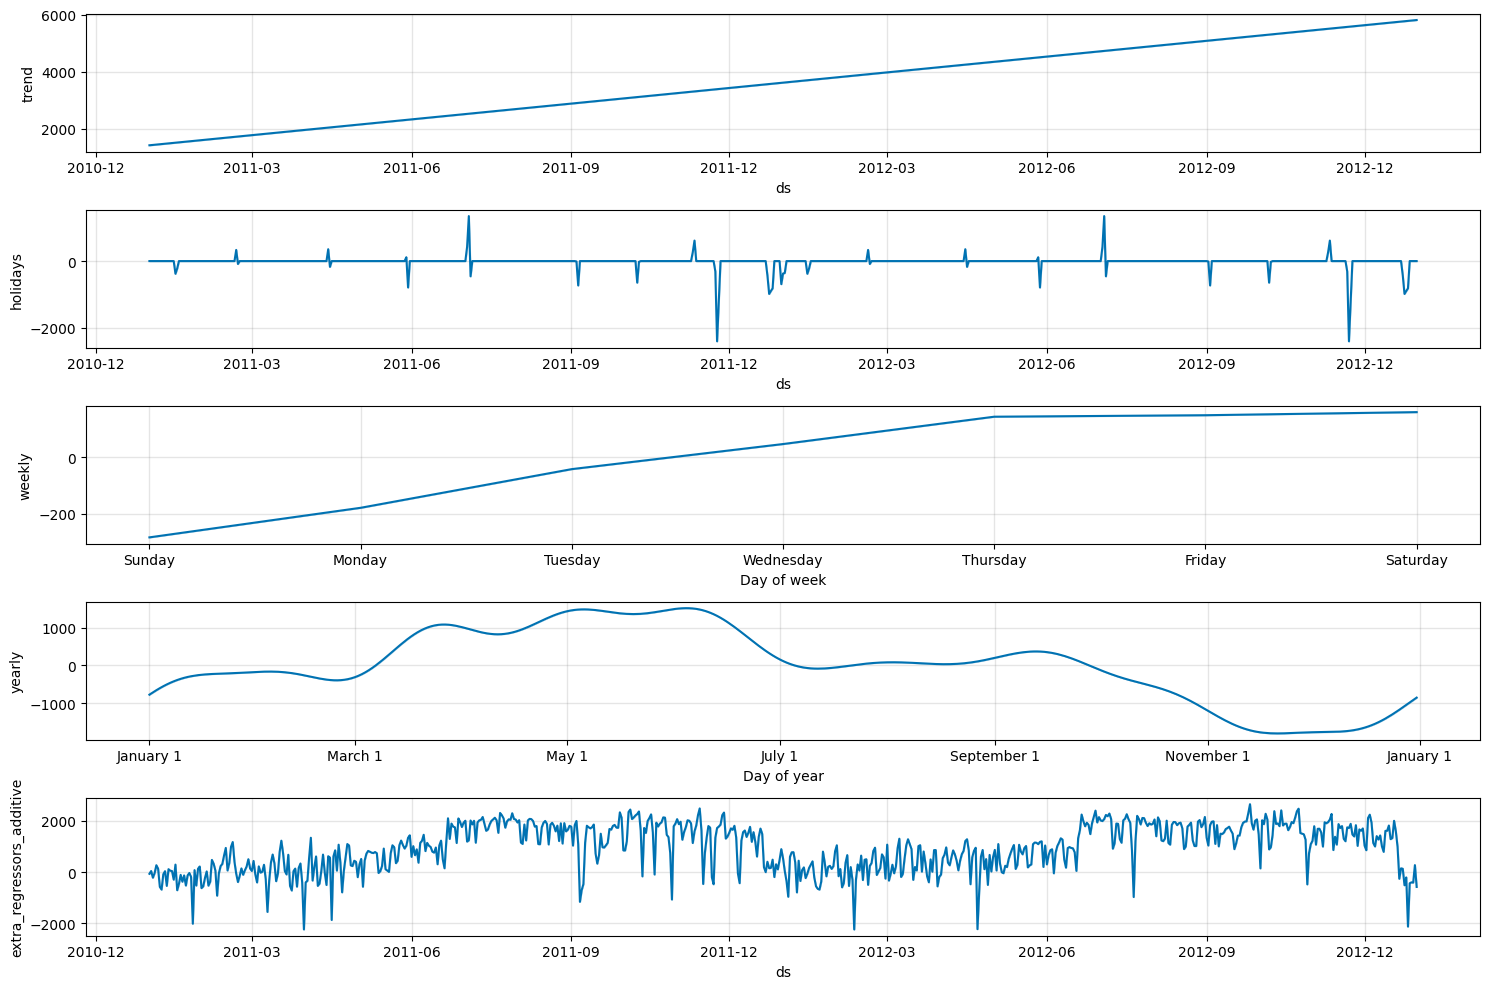

In [52]:
# plot decompositions of Time Series Components
m.plot_components(forecast, figsize=(15, 10));

## Interprete Prophet Coeff

In [53]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,temp,additive,0.502732,5592.608025,5592.608025,5592.608025
1,temp_roll_3,additive,0.502666,-3403.490345,-3403.490345,-3403.490345
2,weathersit_1,additive,0.000000,1150.971262,1150.971262,1150.971262
3,weathersit_2,additive,0.000000,477.824347,477.824347,477.824347
4,weathersit_3,additive,0.000000,-1183.143350,-1183.143350,-1183.143350
5,season_1,additive,0.000000,-343.206118,-343.206118,-343.206118
6,season_2,additive,0.000000,-474.980098,-474.980098,-474.980098
7,season_3,additive,0.000000,279.755999,279.755999,279.755999
8,season_4,additive,0.000000,984.080734,984.080734,984.080734


In [54]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in temp, the target variable changes by 5592.61 units (additively).
For each unit increase in temp_roll_3, the target variable changes by -3403.49 units (additively).
For each unit increase in weathersit_1, the target variable changes by 1150.97 units (additively).
For each unit increase in weathersit_2, the target variable changes by 477.82 units (additively).
For each unit increase in weathersit_3, the target variable changes by -1183.14 units (additively).
For each unit increase in season_1, the target variable changes by -343.21 units (additively).
For each unit increase in season_2, the target variable changes by -474.98 units (additively).
For each unit increase in season_3, the target variable changes by 279.76 units (additively).
For each unit increase in season_4, the target variable changes by 984.08 units (additively).


# Conclusion:

1. Trend is expected to increase within the next year
2. holidays do effect a big impact on the number of bike rent, the greatest holiday impact is in Thanksgiving, Christmast and New Year
3. Yearly seasonality really play a big role on determining the number of bike rent. Weekly seasonality might be there but with little effect.
4. External / Exogenuous Effect such as Current Temp, avg 3 days temp, weather condition, and seasonal effect has strong effect on the number of bike sharing. With the most effect is in temp and the last 3 days temp.